# Predicting Customer Churn

"Customer churn" is a term used to describe when a company loses customers.  The example in this notebook involves a scenario familiar to many: switching mobile phone providers.  If my provider could identify my intent to switch early, it could entice me to stay with timely offers, such as a phone upgrade or a new service feature.

Machine learning can help us identify patterns in the data for customers who left in the past, thus helping us prevent the same churn in the future.

The data for this notebook is included in `churn.csv`.

# 1. Setup

Import the necessary libraries.  NOTE: If you're using an environment other than Google Colab, you may need to first install some of these using `!pip`.
*   **pandas**: A library for organizing and manipulating data, making it easy to work with tables.
*   **numpy**: A library for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
*   **matplotlib**: A plotting library for Python, used to create static, animated, and interactive graphs and charts.
*   **seaborn**: A statistical data visualization library built on top of matplotlib, offering a higher-level interface for drawing statistical graphics.
*   **xgboost**: An optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable, used for building machine learning models, especially for solving data science challenges involving structured data.





In [1]:
# If you need to install libraries, you can do so using this syntax
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# 2. Data Cleansing and Exploratory Data Analysis

It all starts with data.  Load the data from churn.csv into a DataFrame, then explore and visualize it to help us better understand what we're working with, and what will be most important to pass to the model when we train it.

In [3]:
# LOAD THE DATA

# We'll use pandas to load the CSV data into a DataFrame
# If using Google Colab, the file should be uploaded to /content folder
churn = pd.read_csv('churn.csv')

# Display the first five rows of the dataset to understand its structure
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
# CLEAN THE DATA

# Check for missing values
# If there are any missing values, you can fill them with a placeholder or drop them, depending on the context
# We don't actually have missing values in this dataset, we'll just print
print(churn.isnull().sum())

# Standardize data for boolean columns, making everything "True" or "False"
churn["Churn?"] = churn["Churn?"].map({'False.': False, 'True.': True})
churn["Int'l Plan"] = churn["Int'l Plan"].map({'no': False, 'yes': True})
churn["VMail Plan"] = churn["VMail Plan"].map({'no': False, 'yes': True})

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64


C:\Users\I44886\AppData\Local\Temp\ipykernel_41008\1019062673.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


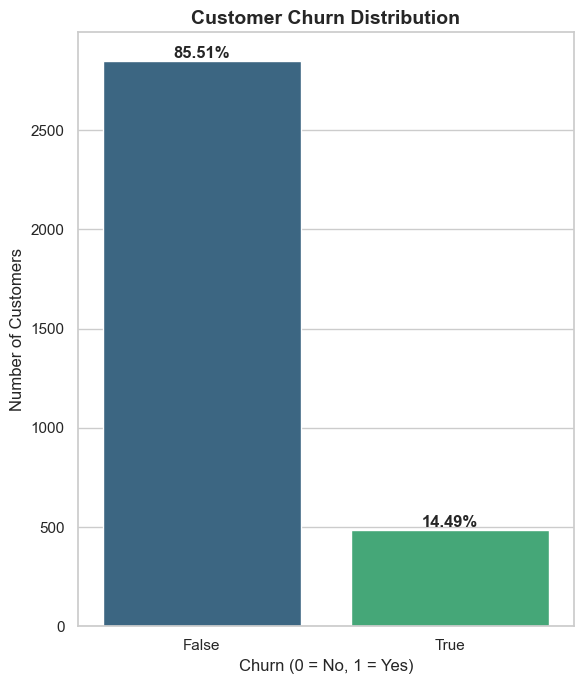

Percentage of customers who churned: 14.49%


C:\Users\I44886\AppData\Local\Temp\ipykernel_41008\1019062673.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Percentage of customers who churned: {churn_percent[1]:.2f}%")


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your DataFrame is called 'churn' and the column is 'Churn?'

# Set plot style for modern look
sns.set(style="whitegrid")

# Calculate percentage for annotation
churn_counts = churn['Churn?'].value_counts()
churn_percent = churn['Churn?'].value_counts(normalize=True) * 100

# Plot the distribution with percentage labels
fig, ax = plt.subplots(figsize=(6, 7))
bars = sns.barplot(
    x=churn_counts.index,
    y=churn_counts.values,
    palette='viridis',
    ax=ax
)

# Add percentage labels to each bar
for bar, pct in zip(bars.patches, churn_percent):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{pct:.2f}%',
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

# Set labels, title, and make layout tight
ax.set_xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_title('Customer Churn Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print the percentage of customers who churned
print(f"Percentage of customers who churned: {churn_percent[1]:.2f}%")


There is some imbalance in the data, as only 14.49% of customers churned, but this is not extreme imbalance.

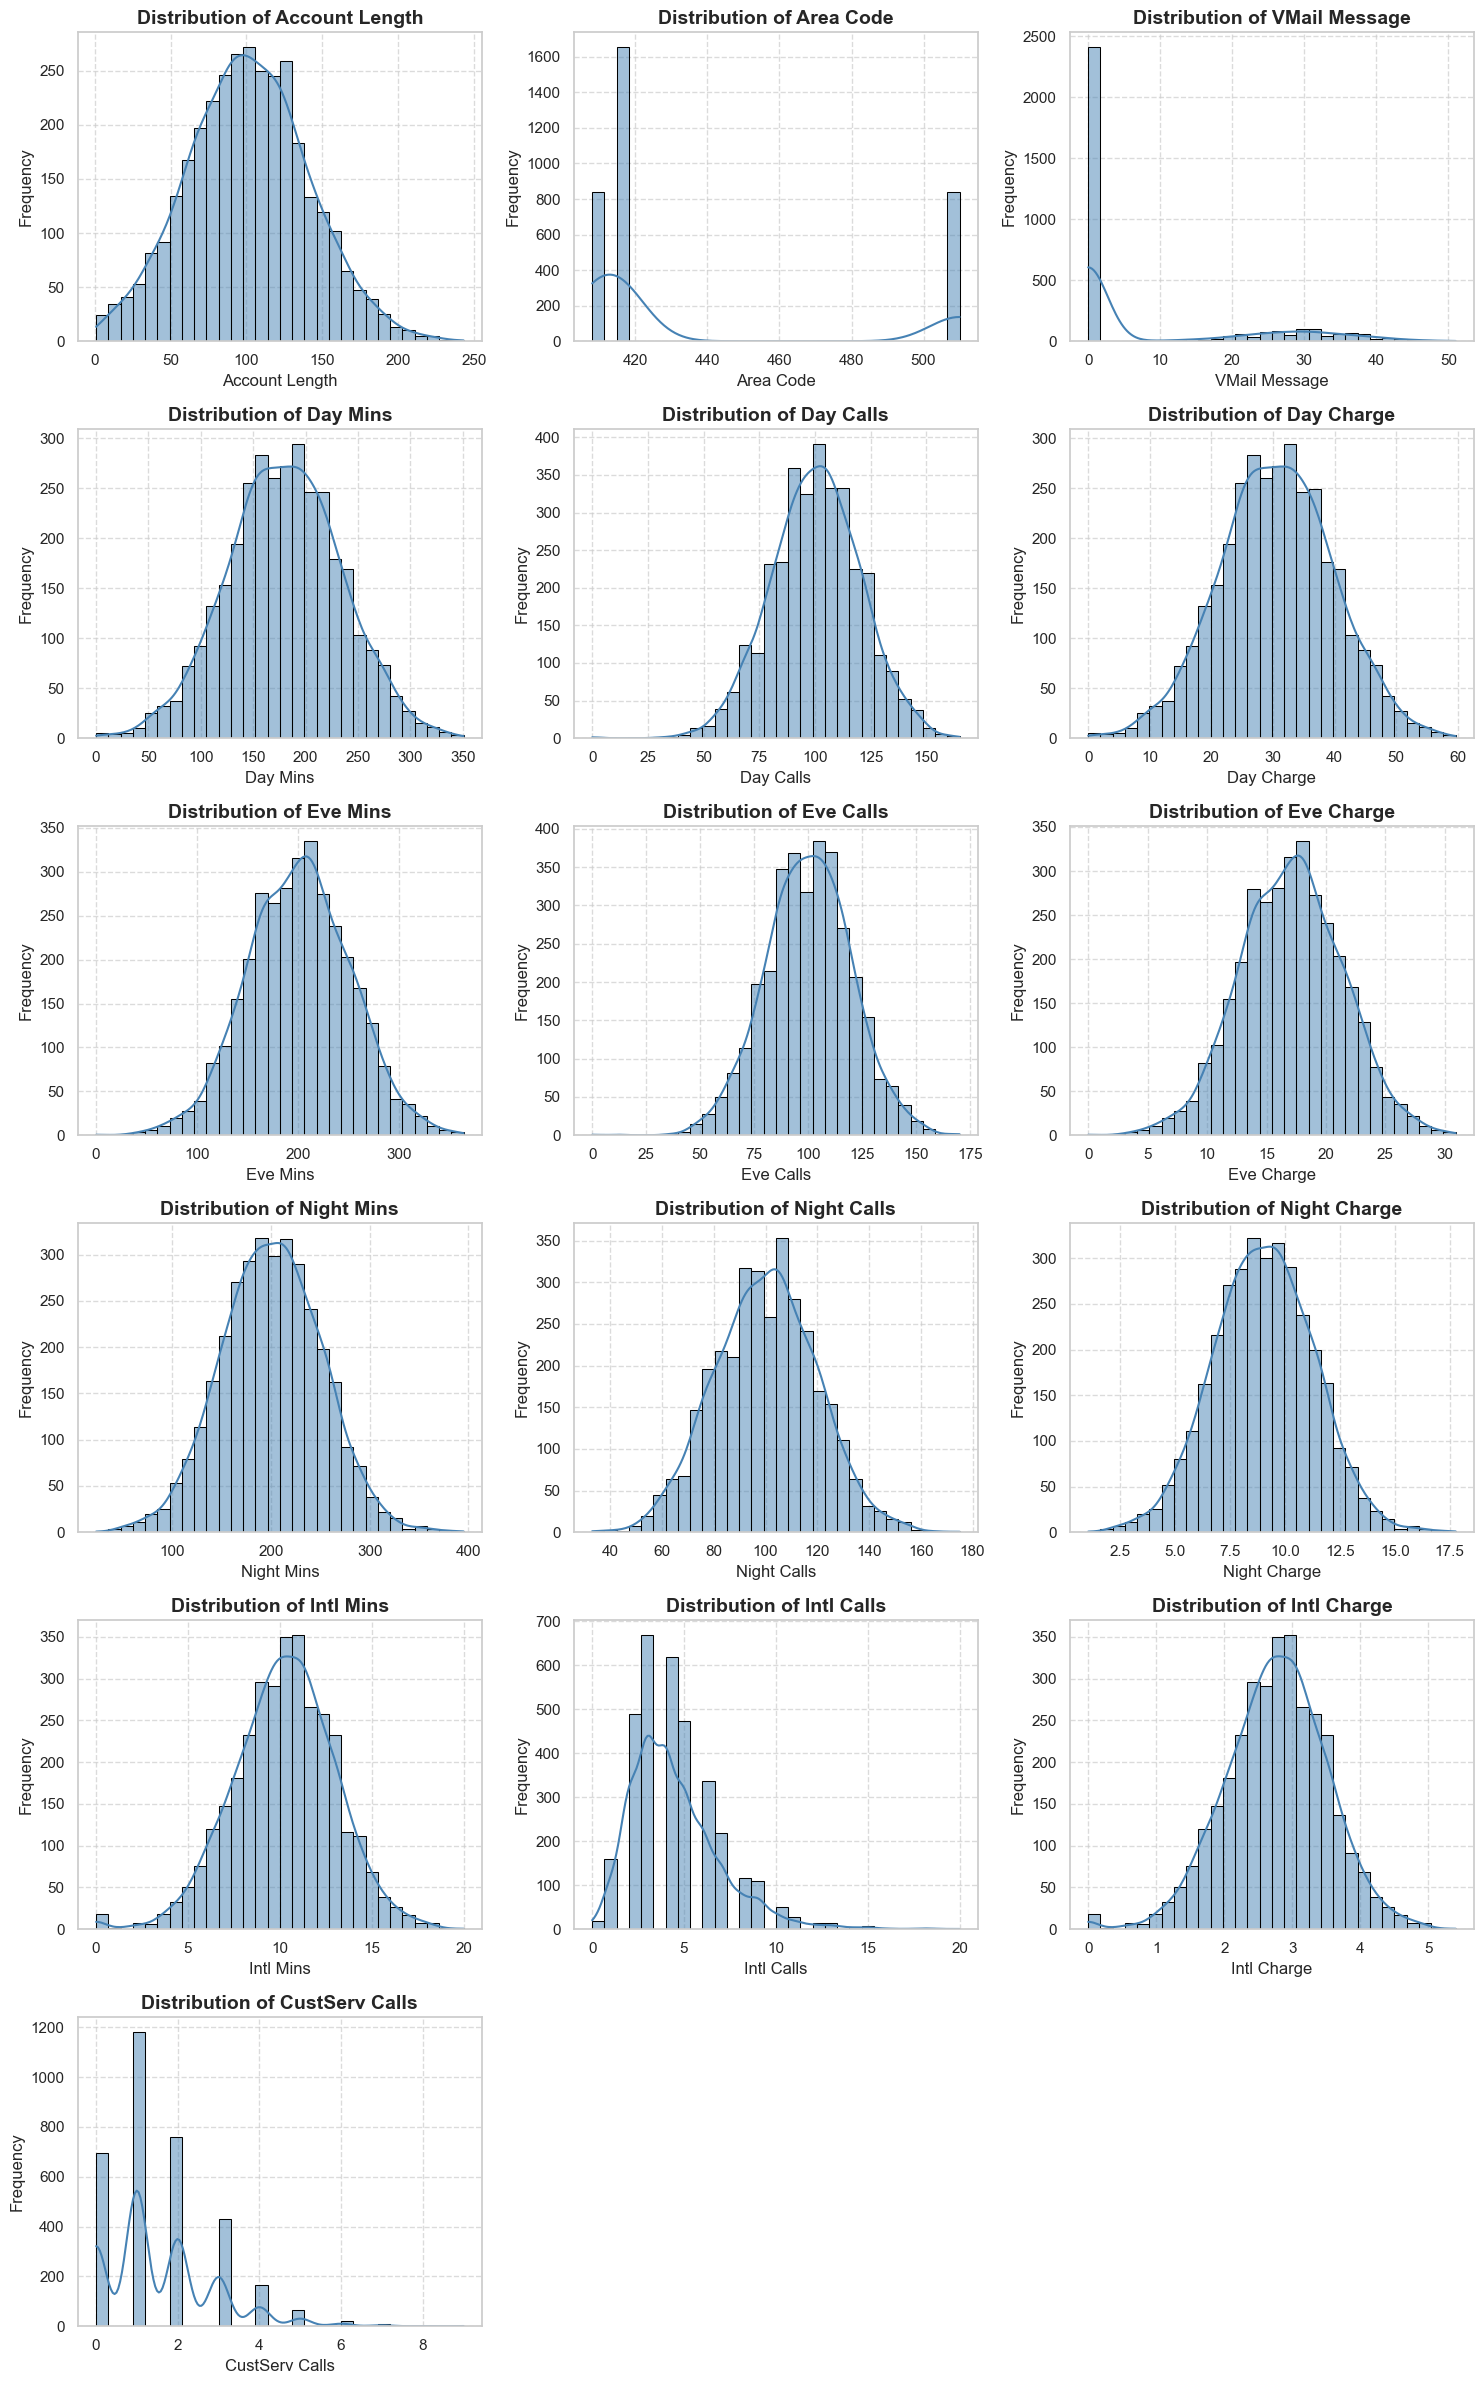

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for clarity and aesthetics
sns.set(style='whitegrid')

# Select only numeric columns for histograms
numeric_cols = churn.select_dtypes(include=np.number).columns.tolist()

# Number of columns (max 3 per row for readability)
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Histogram with KDE overlay for distribution insight
    sns.histplot(
        churn[col],
        bins=30,
        kde=True,
        color='steelblue',
        edgecolor='black',
        ax=axes[i]
    )
    axes[i].set_title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Remove unused subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Display descriptive statistics for each numeric feature
display(churn.describe())


Most numeric features are well-distributed, showing a bell-shaped (or Gaussian) distribution.  In machine learning, this normality is desired for optimal perforamnce of the algorithms.  The exceptions are `VMail Message` and `Area Code`, which we'll handle below.

In [7]:
# Iterate over categorical columns (including 'object' and 'bool' types)
categorical_cols = churn.select_dtypes(include=['object', 'bool']).columns

for column in categorical_cols:
    print(f"Frequency Table for '{column}':\n")
    # Calculate frequency table normalized by the total count to get percentages
    freq_table = churn[column].value_counts(normalize=True).mul(100).round(2)
    # Convert to DataFrame for nicer display
    freq_df = pd.DataFrame(freq_table)
    freq_df.columns = ['Percentage (%)']
    display(freq_df)
    print("\n" + "-"*50 + "\n")


Frequency Table for 'State':



,Percentage (%)
State,
WV,3.18
MN,2.52
NY,2.49
AL,2.40
OH,2.34
WI,2.34
OR,2.34
WY,2.31
VA,2.31



--------------------------------------------------

Frequency Table for 'Phone':



,Percentage (%)
Phone,
400-4344,0.03
382-4657,0.03
371-7191,0.03
358-1921,0.03
375-9999,0.03
...,...
330-8173,0.03
335-4719,0.03
329-9001,0.03



--------------------------------------------------

Frequency Table for 'Int'l Plan':



,Percentage (%)
Int'l Plan,
False,90.31
True,9.69



--------------------------------------------------

Frequency Table for 'VMail Plan':



,Percentage (%)
VMail Plan,
False,72.34
True,27.66



--------------------------------------------------

Frequency Table for 'Churn?':



,Percentage (%)
Churn?,
False,85.51
True,14.49



--------------------------------------------------



This exploration tells us:
*   `State`: Fairly well distributed; we will check correlations later
*   `Phone`: With all the unique values, it will be hard to use this as a feature.  We should drop this, along with `Area Code`, as it goes with `Phone`.
*   `Int'l Plan`: We will  check correlations later
*   `VMail Plan`: We will check correlations later
*   `Churn`: The target feature; included here because it's a categorical feature (meaning it can take on just a fixed number of possible values)

In [8]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,False,True,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,False,True,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,False,False,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,True,False,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,True,False,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


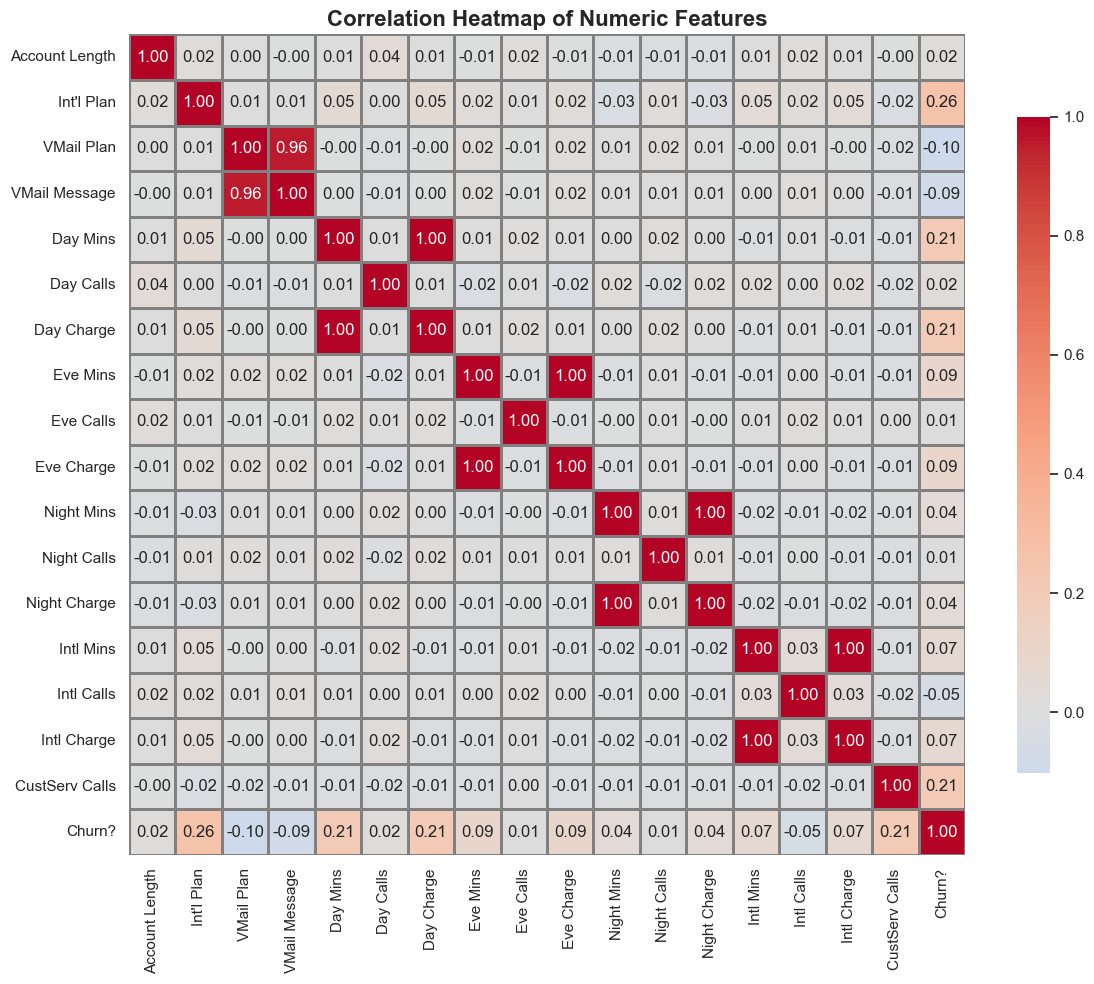

C:\Users\I44886\AppData\Local\Temp\ipykernel_41008\3271335064.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


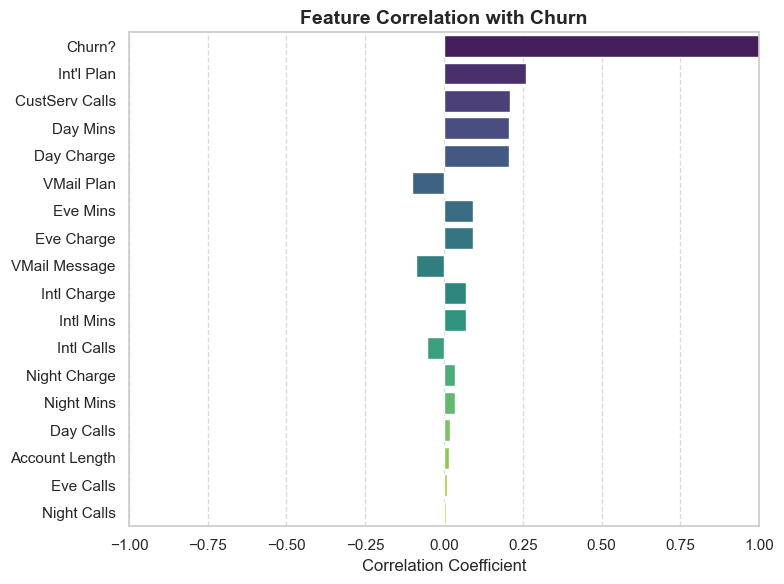

Churn?            1.000000
Int'l Plan        0.259852
CustServ Calls    0.208750
Day Mins          0.205151
Day Charge        0.205151
VMail Plan       -0.102148
Eve Mins          0.092796
Eve Charge        0.092786
VMail Message    -0.089728
Intl Charge       0.068259
Intl Mins         0.068239
Intl Calls       -0.052844
Night Charge      0.035496
Night Mins        0.035493
Day Calls         0.018459
Account Length    0.016541
Eve Calls         0.009233
Night Calls       0.006141
Name: Churn?, dtype: float64


In [9]:
# Drop 'Phone' and 'Area Code' as you did
churn = churn.drop(['Phone', 'Area Code'], axis=1)

# Convert 'Churn?' column to numeric if it's boolean or categorical
if churn['Churn?'].dtype == 'bool':
    churn['Churn?'] = churn['Churn?'].astype(int)
elif churn['Churn?'].dtype == 'object':
    churn['Churn?'] = churn['Churn?'].map({False: 0, True: 1, 'False': 0, 'True': 1})

# similarly convert Intl Plan and VMail Plan to numeric
if churn['Int\'l Plan'].dtype == 'bool':
    churn['Int\'l Plan'] = churn['Int\'l Plan'].astype(int)
elif churn['Int\'l Plan'].dtype == 'object':
    churn['Int\'l Plan'] = churn['Int\'l Plan'].map({'no': 0, 'yes': 1})
    
#VMail Plan conversion
if churn['VMail Plan'].dtype == 'bool':
    churn['VMail Plan'] = churn['VMail Plan'].astype(int)
elif churn['VMail Plan'].dtype == 'object':
    churn['VMail Plan'] = churn['VMail Plan'].map({'no': 0, 'yes': 1})

# Select only numeric columns for correlation matrix
numeric_churn = churn.select_dtypes(include=[np.number])

# Compute correlation matrix on numeric data only
corr = numeric_churn.corr()

# Plot correlation heatmap with a diverging colormap for clear positive/negative contrasts
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.8,
    linecolor='gray',
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Extract correlations with 'Churn?' column, sorting by absolute values descending
churn_correlations = corr['Churn?'].sort_values(key=np.abs, ascending=False)

# Plot correlations with churn
plt.figure(figsize=(8, 6))
sns.barplot(
    x=churn_correlations.values,
    y=churn_correlations.index,
    palette='viridis'
)
plt.title('Feature Correlation with Churn', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient')
plt.ylabel('')
plt.xlim(-1, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display correlation values
print(churn_correlations)


This exploration tells us:

*   `Int'l Plan`: There's a positive correlation (0.26) between having an international plan and churn, suggesting customers with international plans are more likely to churn. This could be due to various factors such as cost, satisfaction with international service, or other reasons that warrant further investigation.

*   `CustServ Calls`: The number of customer service calls is positively correlated (0.21) with churn, indicating that customers who contact customer service more frequently are more likely to leave. This might reflect issues with service satisfaction or unresolved problems.

*   `Day Mins` and `Day Charge`: Both of these features show a positive correlation (about 0.21) with churn, suggesting that higher day time usage (and the associated charges) could be a factor in customers' decision to churn.

*   `VMail Plan` and `VMail Message`: These features are negatively correlated with churn (-0.10 and -0.09, respectively), indicating that customers who use voicemail services are less likely to churn. This could be interpreted as an indicator of customer engagement or satisfaction with the service.

*   `Intl Calls`: Interestingly, the number of international calls is negatively correlated (-0.05) with churn, which might suggest that customers making more international calls are less likely to leave, contrasting with the positive correlation seen with having an international plan.


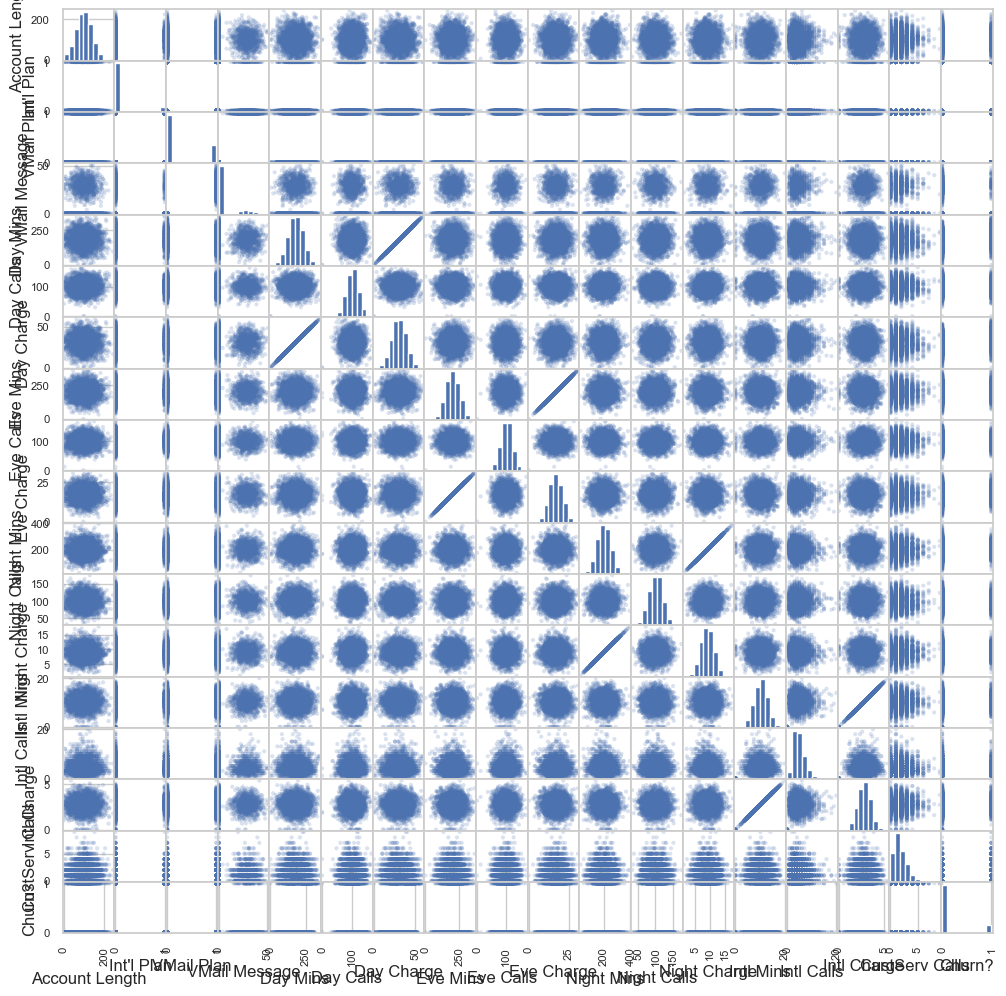

In [10]:
# Scatter matrix to visualize the relationship between non-target (i.e., "Churn") features
pd.plotting.scatter_matrix(churn.select_dtypes(include=[np.number]), figsize=(12, 12), alpha=0.2)
plt.show()

This exploration tells us:


*   Some features (the ones with a diagonal line on the scatter matrix) have a correlation of 100% with one another (such as Day Charge and Day Mins, Night Charge and Night Mins)
*   Features like this can cause problems when we train the model later, so we'll remove the "Charge" features

In [11]:
# Drop features for Day Charge, Eve Charge, Night Charge, Intl Charge to remove the 100% correlation issue
churn = churn.drop(["Day Charge", "Eve Charge", "Night Charge", "Intl Charge"], axis=1)

In [12]:
# One-hot encode the State column so we have 0s and 1s rather than string data
churn_encoded = pd.get_dummies(churn, columns=['State'])

# 3. Building and Training the Model

In this section, we split the data into training, validation and test sets.  Then we build the model, inputting various parameters.  Finally, we train the model on the training dataset, evaluting it with the validation dataset.

In [13]:
# Split the data into training, validation and test sets

# Randomly shuffle the dataset and split it into training (70%), validation (20%), and testing (10%) sets
train_data, validation_data, test_data = np.split(churn_encoded.sample(frac=1, random_state=1729),
                                                  [int(0.7 * len(churn)), int(0.9 * len(churn))])

C:\Users\I44886\AppData\Roaming\Python\Python311\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [14]:
# Assuming the last column "Churn?" is the target variable
# Separate the features and the target variable for each dataset
X_train = train_data.drop("Churn?", axis=1)
y_train = train_data["Churn?"]
X_val = validation_data.drop("Churn?", axis=1)
y_val = validation_data["Churn?"]
X_test = test_data.drop("Churn?", axis=1)
y_test = test_data["Churn?"]

# Convert the datasets into DMatrix format for XGBoost
# XGBoost works well with DMatrix, a data structure optimized for both memory efficiency and training speed
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

In [15]:
# Specify parameters for the model
params = {
    'max_depth': 3,  # The maximum depth of the decision tree; can be adjusted (typically ranges 3-10)
    'eta': 0.1,  # The learning rate (how much the model adjusts itself in response to errors); can be adjusted
    'objective': 'binary:logistic',  # We're choosing this because it's a binary problem (customers either churn or they don't)
                                     # Logistic means it will output a probability (the probability that a customer will leave)
    'eval_metric': 'auc',  # Evaluation metrics for validation data, e.g., "auc" or "Area Under the Curve" for binary classification
}
num_rounds = 100  # The number of rounds for boosting


In [16]:
# Train the model using the training dataset and evaluate it using the validation dataset
evallist = [(dval, 'eval'), (dtrain, 'train')]
bst = xgb.train(params, dtrain, num_rounds, evallist)

[0]	eval-auc:0.78342	train-auc:0.85028


[1]	eval-auc:0.81259	train-auc:0.86931
[2]	eval-auc:0.81320	train-auc:0.86996
[3]	eval-auc:0.84279	train-auc:0.90276
[4]	eval-auc:0.84590	train-auc:0.90588
[5]	eval-auc:0.84736	train-auc:0.90719
[6]	eval-auc:0.84733	train-auc:0.90679
[7]	eval-auc:0.85321	train-auc:0.90952
[8]	eval-auc:0.85581	train-auc:0.91187
[9]	eval-auc:0.85661	train-auc:0.91204


C:\Users\I44886\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[10]	eval-auc:0.85758	train-auc:0.91264
[11]	eval-auc:0.85461	train-auc:0.92641
[12]	eval-auc:0.86333	train-auc:0.92376
[13]	eval-auc:0.86515	train-auc:0.92840
[14]	eval-auc:0.86630	train-auc:0.92909
[15]	eval-auc:0.86819	train-auc:0.92959
[16]	eval-auc:0.86750	train-auc:0.93092
[17]	eval-auc:0.86817	train-auc:0.92968
[18]	eval-auc:0.86794	train-auc:0.93072
[19]	eval-auc:0.86940	train-auc:0.93106
[20]	eval-auc:0.87017	train-auc:0.93145
[21]	eval-auc:0.87061	train-auc:0.93154
[22]	eval-auc:0.87166	train-auc:0.93246
[23]	eval-auc:0.87220	train-auc:0.93363
[24]	eval-auc:0.87207	train-auc:0.93269
[25]	eval-auc:0.87301	train-auc:0.93319
[26]	eval-auc:0.87230	train-auc:0.93331
[27]	eval-auc:0.87416	train-auc:0.93326
[28]	eval-auc:0.87378	train-auc:0.93454
[29]	eval-auc:0.87391	train-auc:0.93545
[30]	eval-auc:0.87502	train-auc:0.93634
[31]	eval-auc:0.87488	train-auc:0.93659
[32]	eval-auc:0.87448	train-auc:0.93686
[33]	eval-auc:0.87414	train-auc:0.93732
[34]	eval-auc:0.87578	train-auc:0.93806


AUC values range from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
AUC values between 0.5 and 1.0 indicate useful models. A value of 0.5 suggests a model that does no better than random chance.

Higher AUC values indicate better model performance. In our model, the AUC for both the evaluation set (eval-auc) and the training set (train-auc) increases over the iterations, suggesting the  model is learning and improving its ability to distinguish between the classes over time.


# 4. Evaluating the Model



Initially, the gap between training and evaluation AUC is somewhat moderate, but it starts to widen significantly as training progresses. For instance, towards the end (around iteration 99), the train-auc is at 0.97169 while the eval-auc is at 0.87690. This growing gap may suggest that the model is beginning to overfit the training data-—meaning it's getting better at predicting the training data, but not the evaluation data.  This suggests that the model is fitting more to the idiosyncrasies of the training data rather than capturing generalizable patterns that apply to unseen data.

**Actions to Consider**:

**Early Stopping**: Implement early stopping to halt the training process once the evaluation metric stops improving for a specified number of rounds. XGBoost supports early stopping.

**Regularization**: Increase regularization parameters (lambda, alpha) to penalize more complex models and thus mitigate overfitting.

**Parameter Tuning**: Adjust other hyperparameters, like max_depth, min_child_weight, and subsample, to help control model complexity and fit.

**Cross-Validation**: Use XGBoost's built-in cross-validation method to assess model performance more robustly. This might give you a better indication of how the model will perform on unseen data.

**Feature Engineering**: Revisit your features to ensure they're relevant and not leading to overfitting. Removing irrelevant or highly correlated features can sometimes improve model generalizability.

In [17]:
# Implementing early stopping (i.e., train the model to learn from data until it stops getting better)

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,  # Set to a high number intentionally; training may stop much earlier
    evals=[(dval, "eval")],
    early_stopping_rounds=10  # Stops after 10 rounds of no improvement on the eval dataset
)

# After training, you can access the best iteration
# This is the number of the training round where the model performed the best on the validation dataset before it stopped improving
# We'll use this in the next code block
print(f"Best iteration: {bst.best_iteration}")


[0]	eval-auc:0.78342
[1]	eval-auc:0.81259
[2]	eval-auc:0.81320
[3]	eval-auc:0.84279
[4]	eval-auc:0.84590
[5]	eval-auc:0.84736
[6]	eval-auc:0.84733
[7]	eval-auc:0.85321
[8]	eval-auc:0.85581
[9]	eval-auc:0.85661
[10]	eval-auc:0.85758
[11]	eval-auc:0.85461
[12]	eval-auc:0.86333
[13]	eval-auc:0.86515
[14]	eval-auc:0.86630
[15]	eval-auc:0.86819
[16]	eval-auc:0.86750
[17]	eval-auc:0.86817
[18]	eval-auc:0.86794
[19]	eval-auc:0.86940
[20]	eval-auc:0.87017
[21]	eval-auc:0.87061
[22]	eval-auc:0.87166
[23]	eval-auc:0.87220
[24]	eval-auc:0.87207
[25]	eval-auc:0.87301
[26]	eval-auc:0.87230
[27]	eval-auc:0.87416
[28]	eval-auc:0.87378
[29]	eval-auc:0.87391
[30]	eval-auc:0.87502
[31]	eval-auc:0.87488
[32]	eval-auc:0.87448
[33]	eval-auc:0.87414
[34]	eval-auc:0.87578
[35]	eval-auc:0.87159
[36]	eval-auc:0.87220
[37]	eval-auc:0.87135
[38]	eval-auc:0.87328
[39]	eval-auc:0.87331
[40]	eval-auc:0.87879
[41]	eval-auc:0.88108
[42]	eval-auc:0.88140
[43]	eval-auc:0.87845
[44]	eval-auc:0.87832
[45]	eval-auc:0.8786

In [22]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.9 MB 1.4 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/8.9 MB 1.7 MB/s eta 0:00:05
   -------- ------------------------------- 1.8/8.9 MB 1.9 MB/s eta 0:00:04
   ----------- ---------------------------- 2.6/8.9 MB 2.3 MB/s eta 0:00:03
   -------------- ------------------------- 3.1/8.9 MB 2.4 MB/s eta 0:00:03
   ------------------ --------------------- 4.2/8.9 MB 2.7 MB/s eta 0:00:02
   ----------------------- ---------------- 5.2/8.9 MB 3.0 MB/s eta 0:00:02
   ---------------------------- ----------- 6


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# Make predictions with the test dataset on the final (best) model

# Predicting the probabilities for the positive class ("Churn")
y_pred_proba = bst.predict(dtest, iteration_range=(0, bst.best_iteration + 1))
import sklearn
# The scikit-learn library is great for calculating AUC and other metrics, though this could also be calculated manually
from sklearn.metrics import roc_auc_score

# Print the final AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Final AUC on Test Dataset: {auc_score:.3f}")

Final AUC on Test Dataset: 0.923


An AUC score of over 0.9 is often considered excellent in many applications. It indicates strong differentiation between the positive and negative classes in the dataset, suggesting that the model has a good predictive ability for the task at hand.